In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 


### Random Forest

In [3]:
dataset = pd.read_csv('Boston.csv') 

In [4]:
y = dataset["medv"]
X = dataset.drop(labels = "medv", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
MAE_list = []; MSE_list = []; RMSE_list = []
### Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
for i in range(len(X.columns)):
    regressor = RandomForestRegressor(n_estimators=i+1, random_state=0) 
    regressor.fit(X_train, y_train) 
    y_pred = regressor.predict(X_test)
    MAE_list.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_list.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Text(0.5, 1.0, 'Root Mean Squared Error')

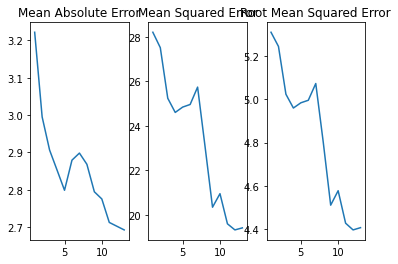

In [29]:
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
plt.plot([i+1 for i in range(len(X.columns))], MAE_list)
plt.title("Mean Absolute Error")

plt.subplot(1, 3, 2)
plt.plot([i+1 for i in range(len(X.columns))], MSE_list)
plt.title("Mean Squared Error")

plt.subplot(1, 3, 3)
plt.plot([i+1 for i in range(len(X.columns))], RMSE_list)
plt.title("Root Mean Squared Error")

In [31]:
regressor = RandomForestRegressor(n_estimators=13, random_state=0) 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
MAE_list.append(metrics.mean_absolute_error(y_test, y_pred))
MSE_list.append(metrics.mean_squared_error(y_test, y_pred))
RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('Accuracy score:', regressor.score(X_test, y_test))

Mean Absolute Error: 2.692533936651584
Mean Squared Error: 19.407573384383337
Root Mean Squared Error: 4.405402749395717
Accuracy score: 0.7616609920567147


### Boosted Tree

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=5000, learning_rate=learning_rate, max_features=10, max_depth=4, random_state=0)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
    print(" ")

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.758
Mean Squared Error: 19.673416944892704
 
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.765
Mean Squared Error: 19.10482996239304
 
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.742
Mean Squared Error: 20.970634153345774
 
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.789
Mean Squared Error: 17.17604030217803
 
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.732
Mean Squared Error: 21.78625390938727
 
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.711
Mean Squared Error: 23.56329011173156
 
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.594
Mean Squared Error: 33.053608573104306
 
